In [141]:
import pandas as pd

In [11]:
df = pd.read_csv('spam.csv',encoding='iso-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# 1. Data cleaning

In [12]:
df.shape

(5572, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### REMOVING UNWANTED COLUMNS

In [14]:
df = df.drop(df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],axis=1)

In [15]:
df.sample(10)

,v1,v2
4757,spam,URGENT! Your Mobile number has been awarded wi...
3651,ham,"Probably not, still going over some stuff here"
491,spam,Congrats! 1 year special cinema pass for 2 is ...
1265,ham,Im in inperialmusic listening2the weirdest tra...
4131,ham,Hi baby ive just got back from work and i was ...
969,ham,It wont b until 2.15 as trying 2 sort house ou...
4089,spam,We tried to call you re your reply to our sms ...
361,ham,Oh ok no prob..
5418,ham,So how are you really. What are you up to. How...
2995,ham,They released vday shirts and when u put it on...


### RENAMING THE COLUMNS

In [16]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [17]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### CHECKING FOR THE NULL VALUES

In [18]:
df.isnull().sum()

label    0
text     0
dtype: int64

### CHECKING FOR THE DUPLICATED ROWS

In [19]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(keep='first',inplace=True)

In [21]:
df.shape

(5169, 2)

In [22]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

### LABEL ENCODING THE OUTPUT COLUMN

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le.fit_transform(df['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [25]:
df['label']=le.fit_transform(df['label'])

In [26]:
df

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA

In [27]:
from matplotlib import pyplot as plt

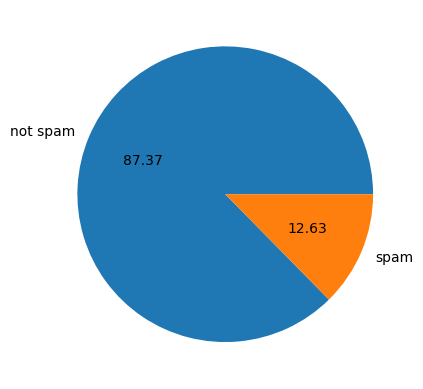

In [28]:
plt.pie(df['label'].value_counts(),labels=['not spam','spam'],autopct='%0.2f')
plt.show()

In [29]:





#4516/5169

In [30]:
#data is imbalanced

In [31]:
import nltk

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SURESH
[nltk_data]     PATEL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### EXTRACTING THE LENGTH OF THE CHARACTERS

In [33]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [34]:
df['len_characters']=df['text'].apply(len)
df

,label,text,len_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


### EXTRACTING THE WORDS LENGTH

In [35]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [36]:
df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [37]:
#example
example = df['text'][0]
example

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [38]:
nltk.word_tokenize(example)

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 '...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat',
 '...']

In [39]:
df['len_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [40]:
df

,label,text,len_characters,len_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


### EXTRACTING THE LENGTH OF THE SENTENCES

In [41]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [42]:
df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [43]:
example

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
nltk.sent_tokenize(example)

['Go until jurong point, crazy..',
 'Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [45]:
len(nltk.sent_tokenize(example))

2

In [46]:
df['len_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [47]:
df

,label,text,len_characters,len_words,len_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


### ANALYZING THE LENGTHS 

In [48]:
df.describe()

,label,len_characters,len_words,len_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [49]:
#for not spam messages
df[df['label'] == 0][['len_characters','len_words','len_sentences']].describe()

,len_characters,len_words,len_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
#for spam messages
df[df['label']==1][['len_characters','len_words','len_sentences']].describe()

,len_characters,len_words,len_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [51]:
#we can say that spam messages are bigger than the non spam messages by looking at the mean.

<Axes: xlabel='len_characters', ylabel='Count'>

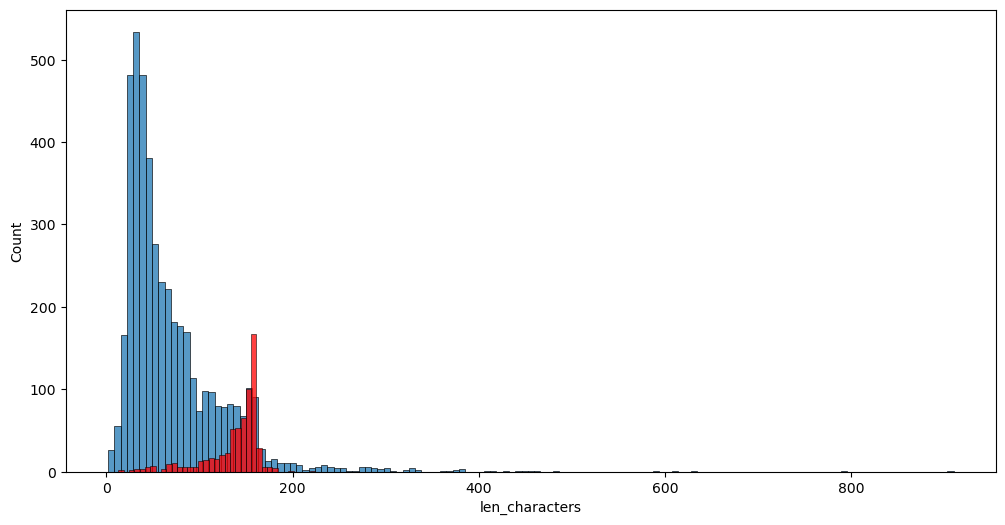

In [52]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['len_characters'])  #we see that more number of messages has less number of chars
sns.histplot(df[df['label']==1]['len_characters'],color='red')#we see that more number of messages has more number of chars

<Axes: xlabel='len_words', ylabel='Count'>

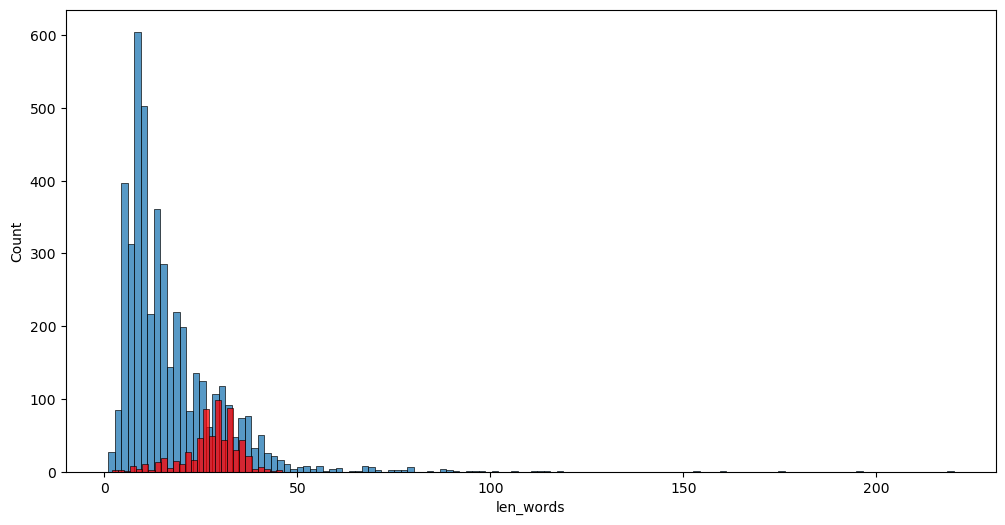

In [53]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['len_words'])  #we see that more number of messages has less number of chars
sns.histplot(df[df['label']==1]['len_words'],color='red')#we see that more number of messages has more number of chars

<Axes: xlabel='len_sentences', ylabel='Count'>

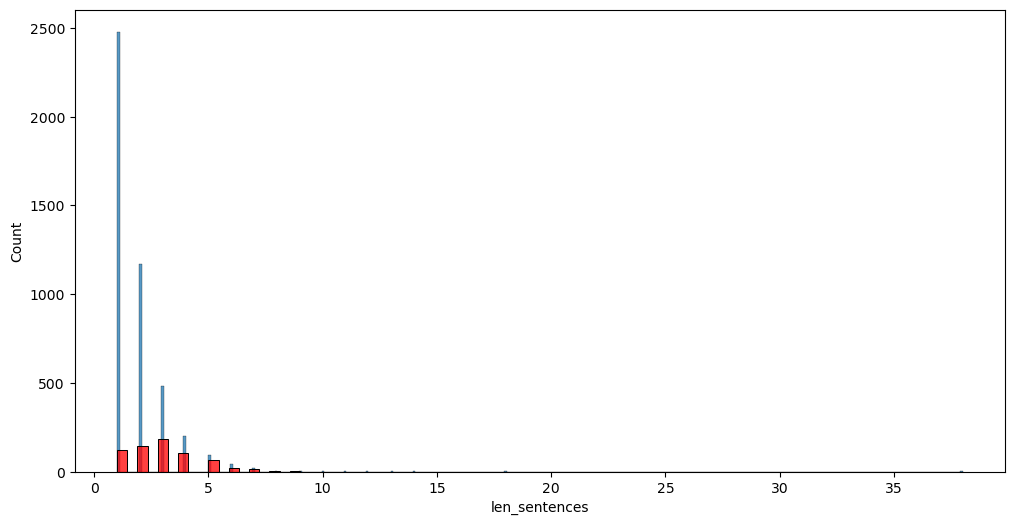

In [54]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['len_sentences'])  #we see that more number of messages has less number of chars
sns.histplot(df[df['label']==1]['len_sentences'],color='red')#we see that more number of messages has more number of chars

In [55]:
#there are still outliers that has chars upto 600, 800, 900 and words upto 
#150 to 200 as well as sentences upto 10-20 in the non spam messages.

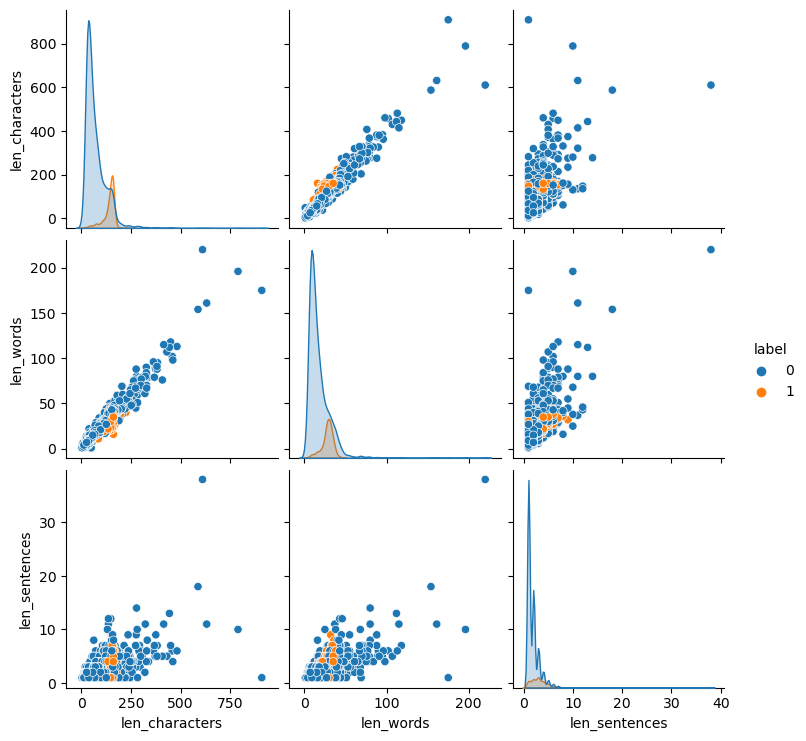

In [56]:
sns.pairplot(df,hue='label')

In [57]:
#there are outliers here

C:\Users\SURESH PATEL\AppData\Local\Temp\ipykernel_7228\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

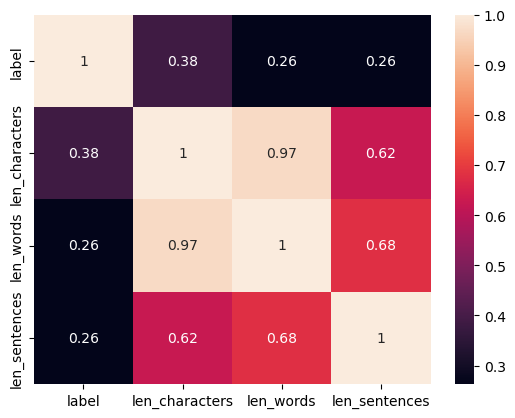

In [58]:
sns.heatmap(df.corr(),annot=True)

In [59]:
#from the above heatmap we can see that
#there is multicollinearity between len_chars and len_sent as well as len_chars and len_words 
#we cannot keep all the cols
#we will only keep chars as it has the highest corr of 0.38 with the target.

# 3. TEXT PREPROCESSING

# a. LOWERCASING THE TEXT

In [60]:
df['text'].str.lower()

0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: text, Length: 5169, dtype: object

In [61]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [62]:
df['text'] = df['text'].str.lower()
df

,label,text,len_characters,len_words,len_sentences
0,0,"go until jurong point, crazy.. available only ...",111,24,2
1,0,ok lar... joking wif u oni...,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,will ì_ b going to esplanade fr home?,37,9,1
5569,0,"pity, * was in mood for that. so...any other s...",57,15,2
5570,0,the guy did some bitching but i acted like i'd...,125,27,1


# b. removing punctuation

In [63]:
import string
punc = string.punctuation
def remove_punctuation(text):
    for char in punc:
        text = text.replace(char,'')
    return text

In [64]:
remove_punctuation(example)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [65]:
df['text'].apply(remove_punctuation).sample(10)

2733                             do ì noe if ben is going
3217          don knowthis week im going to tirunelvai da
1951    haha really oh no how then will they deduct yo...
4357    our dating service has been asked 2 contact u ...
4595    carlos is down but i have to pick it up from h...
4669    i didnt get ur full msgsometext is missing sen...
3851                    no its truekdo u knw dis no ltgt 
827                                  hey you got any mail
3820    you are right though i cant give you the space...
355     thank you for callingforgot to say happy onam ...
Name: text, dtype: object

In [66]:
df['text']=df['text'].apply(remove_punctuation)

In [67]:
df['text'][0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

# c. chat word treatment

In [68]:
import re
import pandas as pd
chat_words = {}
slangs = pd.read_csv('slang.csv')
slangs.drop('Unnamed: 0',axis=1,inplace=True)
chat_words = slangs.set_index('acronym')['expansion'].to_dict()
chat_words

{'2day': 'today',
 '2m2h': 'too much too handle',
 '2moro': 'tomorrow',
 '2nite': 'tonight',
 '4eae': 'for ever and ever',
 'aaf': 'always and forever',
 'aar': 'at any rate',
 'aayf': 'as always your friend',
 'abd': 'already been done',
 'ack': 'acknowledge',
 'adih': 'another day in hell',
 'adn': 'any day now',
 'adr': 'all due respect',
 'aeap': 'as early as possible',
 'afaic': 'as far as i am concerned',
 'afaik': 'as far as i know',
 'aka': 'also known as',
 'ama': 'ask me anything against medical advice',
 'ambw': 'all my best wishes',
 'aml': 'all my love',
 'aota': 'all of the above',
 'asap': 'as soon as possible',
 'atb': 'all the best',
 'ateotd': 'at the end of the day',
 'atm': 'at the moment automated teller machine ',
 'awol': 'absent without leave',
 'aydy': 'are you done yet',
 'ayec': 'at your earliest convenience',
 'ayor': 'at your own risk',
 'ays': 'are you serious',
 'aysos': 'are you stupid or something',
 'ayt': 'are you there',
 'b/c': 'because',
 'b4': 'be

In [69]:
def chat_conversation(text):
    new_text = []
    for w in text.split():
        w = remove_punctuation(w)
        if w in chat_words:
            new_text.append(chat_words[w])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [70]:
df['text'][547]

'sorry that took so long omw now'

In [71]:
chat_conversation(df['text'][547])

'sorry that took significant other shout out long on my way now'

In [72]:
df['text'] = df['text'].apply(chat_conversation)

In [73]:
df['text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp time out win fa cu...
3       u dun say significant other shout out early ho...
4       nah i dont think happy ending high explosives ...
                              ...                        
5567    this is the 2nd tears in my eyes whatever have...
5568            will ì b going time out esplanade fr home
5569    pity wait and see in mood for that soany other...
5570    the guy did some bitching but i acted like id ...
5571    rolling on floor laughing i think or thought s...
Name: text, Length: 5169, dtype: object

# d. stopwords removal

In [74]:
from nltk.corpus import stopwords

In [75]:
stopwords = stopwords.words()

In [76]:
def remove_stopwords(text):
    filtered_words = [word for word in text.split() if word.casefold() not in stopwords]
    return ' '.join(filtered_words)

In [77]:
df['text'][0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [78]:
remove_stopwords(df['text'][0])

'jurong point crazy available bugis great world buffet amore'

In [79]:
df['text'] = df['text'].apply(remove_stopwords)

In [80]:
df['text']

0       jurong point crazy available bugis great world...
1                                          lar joking wif
2       free entry 2 wkly comp time win cup final tkts...
3                             dun significant shout early
4       happy ending high explosives time usf happy en...
                              ...                        
5567    2nd tears eyes 2 contact å£750 pound prize 2 c...
5568                           ì b time esplanade fr home
5569                     pity wait mood soany suggestions
5570    guy bitching acted id interested buying week h...
5571                          rolling floor laughing time
Name: text, Length: 5169, dtype: object

# e. tokenization

In [81]:
def tokenize(text):
    result = nltk.word_tokenize(text)
    return result
    

In [82]:
tokenize(df['text'][0])

['jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'buffet',
 'amore']

In [83]:
df['text'].apply(tokenize)

0       [jurong, point, crazy, available, bugis, great...
1                                      [lar, joking, wif]
2       [free, entry, 2, wkly, comp, time, win, cup, f...
3                        [dun, significant, shout, early]
4       [happy, ending, high, explosives, time, usf, h...
                              ...                        
5567    [2nd, tears, eyes, 2, contact, å£750, pound, p...
5568                    [ì, b, time, esplanade, fr, home]
5569               [pity, wait, mood, soany, suggestions]
5570    [guy, bitching, acted, id, interested, buying,...
5571                     [rolling, floor, laughing, time]
Name: text, Length: 5169, dtype: object

In [84]:
df['tokenized_text']=df['text'].apply(tokenize)

In [85]:
df

,label,text,len_characters,len_words,len_sentences,tokenized_text
0,0,jurong point crazy available bugis great world...,111,24,2,"[jurong, point, crazy, available, bugis, great..."
1,0,lar joking wif,29,8,2,"[lar, joking, wif]"
2,1,free entry 2 wkly comp time win cup final tkts...,155,37,2,"[free, entry, 2, wkly, comp, time, win, cup, f..."
3,0,dun significant shout early,49,13,1,"[dun, significant, shout, early]"
4,0,happy ending high explosives time usf happy en...,61,15,1,"[happy, ending, high, explosives, time, usf, h..."
...,...,...,...,...,...,...
5567,1,2nd tears eyes 2 contact å£750 pound prize 2 c...,161,35,4,"[2nd, tears, eyes, 2, contact, å£750, pound, p..."
5568,0,ì b time esplanade fr home,37,9,1,"[ì, b, time, esplanade, fr, home]"
5569,0,pity wait mood soany suggestions,57,15,2,"[pity, wait, mood, soany, suggestions]"
5570,0,guy bitching acted id interested buying week h...,125,27,1,"[guy, bitching, acted, id, interested, buying,..."


# f. stemming

In [86]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

In [87]:
def stem_words(text):
    return " ".join([ps.stem(word) for word in text])

In [88]:
stem_words(df['tokenized_text'][0])

'jurong point crazi avail bugi great world buffet amor'

In [89]:
df['tokenized_text'].apply(stem_words)

0       jurong point crazi avail bugi great world buff...
1                                            lar joke wif
2       free entri 2 wkli comp time win cup final tkt ...
3                                dun signific shout earli
4       happi end high explos time usf happi end high ...
                              ...                        
5567    2nd tear eye 2 contact å£750 pound prize 2 cla...
5568                            ì b time esplanad fr home
5569                         piti wait mood soani suggest
5570    guy bitch act id interest buy week happi end h...
5571                                roll floor laugh time
Name: tokenized_text, Length: 5169, dtype: object

In [90]:
df['transformed_text'] = df['tokenized_text'].apply(stem_words)

In [91]:
df

,label,text,len_characters,len_words,len_sentences,tokenized_text,transformed_text
0,0,jurong point crazy available bugis great world...,111,24,2,"[jurong, point, crazy, available, bugis, great...",jurong point crazi avail bugi great world buff...
1,0,lar joking wif,29,8,2,"[lar, joking, wif]",lar joke wif
2,1,free entry 2 wkly comp time win cup final tkts...,155,37,2,"[free, entry, 2, wkly, comp, time, win, cup, f...",free entri 2 wkli comp time win cup final tkt ...
3,0,dun significant shout early,49,13,1,"[dun, significant, shout, early]",dun signific shout earli
4,0,happy ending high explosives time usf happy en...,61,15,1,"[happy, ending, high, explosives, time, usf, h...",happi end high explos time usf happi end high ...
...,...,...,...,...,...,...,...
5567,1,2nd tears eyes 2 contact å£750 pound prize 2 c...,161,35,4,"[2nd, tears, eyes, 2, contact, å£750, pound, p...",2nd tear eye 2 contact å£750 pound prize 2 cla...
5568,0,ì b time esplanade fr home,37,9,1,"[ì, b, time, esplanade, fr, home]",ì b time esplanad fr home
5569,0,pity wait mood soany suggestions,57,15,2,"[pity, wait, mood, soany, suggestions]",piti wait mood soani suggest
5570,0,guy bitching acted id interested buying week h...,125,27,1,"[guy, bitching, acted, id, interested, buying,...",guy bitch act id interest buy week happi end h...


# f. lemmetization

In [92]:
import nltk
from nltk.stem import WordNetLemmatizer 

In [93]:
wordnet_lem = WordNetLemmatizer()

In [94]:
def lemm_words(text):
    return " ".join([wordnet_lem.lemmatize(word,pos='a') for word in text])

In [95]:
lemm_words(['walking','available','prettier','luckily','happily'])

'walking available pretty luckily happily'

In [96]:
#it is not giving nice results on all at once we need to change the pos 

In [97]:
stem_words(['walking','available','prettier','best','luckily','happily'])

'walk avail prettier best luckili happili'

In [98]:
#therefore we will do stemming

# one single function for preprocessing

In [99]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import re
import pandas as pd

# Initialize PorterStemmer
ps = PorterStemmer()

# Load the slang dictionary
slangs = pd.read_csv('slang.csv')
slangs.drop('Unnamed: 0', axis=1, inplace=True)
chat_words = slangs.set_index('acronym')['expansion'].to_dict()

# Define the combined preprocessing function
def transform_text(text):
    # Step 1: Normalize case
    text = text.lower()
    
    # Step 2: Replace chat abbreviations using the slang dictionary
    def replace_chat_words(word):
        return chat_words.get(word, word)
    
    text = " ".join(replace_chat_words(w) for w in text.split())
    
    # Step 3: Tokenize the text
    text = nltk.word_tokenize(text)
    
    # Step 4: Remove non-alphanumeric tokens
    text = [word for word in text if word.isalnum()]
    
    # Step 5: Remove stopwords and punctuation
    text = [
        word for word in text
        if word not in stopwords.words() and word not in string.punctuation
    ]
    
    # Step 6: Apply stemming
    text = [ps.stem(word) for word in text]
    
    # Step 7: Join the processed words back into a single string
    return " ".join(text)


In [100]:
transform_text(example)

'jurong point crazi avail bugi great world buffet amor'

### MOST FREQUENT WORDS VISUALIZATION

In [101]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=20,background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
not_spam_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

In [102]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


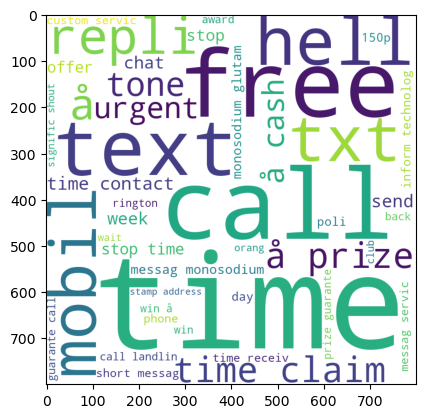

In [103]:
plt.imshow(wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" ")))  #spam

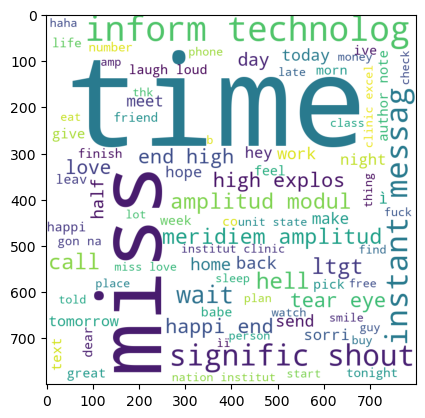

In [104]:
#plt.figure(figsize=(20,14))
plt.imshow(wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" ")))   #not spam

In [105]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [106]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'time',
 'win',
 'cup',
 'final',
 'tkt',
 '21st',
 '2005',
 'text',
 'time',
 '87121',
 'time',
 'receiv',
 'entri',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'fun',
 'inform',
 'technolog',
 'text',
 'back',
 'xxx',
 'std',
 'chg',
 'time',
 'send',
 'å£150',
 'time',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'time',
 'receivea',
 'å£900',
 'prize',
 'reward',
 'time',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'r',
 'entitl',
 'time',
 'updat',
 'time',
 'latest',
 'colour',
 'mobil',
 'hell',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'command',
 'offic',
 'correct',
 'offic',
 'compani',
 'counter',
 'offer',
 'free',
 '08002986030',
 'chanc',
 'time',
 'win',
 'cash',
 '100',
 'time',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 'time',
 '

In [107]:
len(spam_corpus)

10856

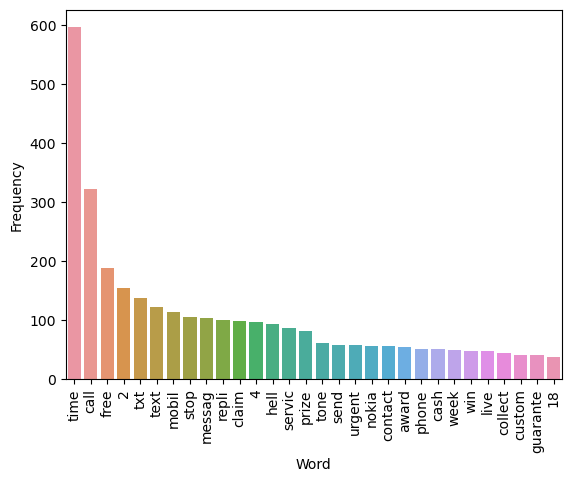

In [108]:
#these are the most common words in a spam text
from collections import Counter

common_words = Counter(spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()


In [109]:
not_spam_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [110]:
not_spam_corpus

['jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'great',
 'world',
 'buffet',
 'amor',
 'lar',
 'joke',
 'wif',
 'dun',
 'signific',
 'shout',
 'earli',
 'happi',
 'end',
 'high',
 'explos',
 'time',
 'usf',
 'happi',
 'end',
 'high',
 'explos',
 'live',
 'miss',
 'brother',
 'time',
 'speak',
 'hell',
 'treat',
 'acquir',
 'immun',
 'defici',
 'syndrom',
 'patent',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'time',
 'copi',
 'friend',
 'callertun',
 'instant',
 'messag',
 'gon',
 'na',
 'home',
 'time',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'ive',
 'cri',
 'today',
 'ive',
 'search',
 'word',
 'time',
 'breather',
 'promis',
 'grant',
 'fulfil',
 'miss',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'hell',
 'half',
 'move',
 'watch',
 'rememb',
 '2',
 'spell',
 'happi',
 'end',
 'high',
 'explos',
 'naughti',
 'make',
 'wet',
 'fine',
 'thatåõ',
 'feel',
 'thatåõ',
 'gota',


In [111]:
len(not_spam_corpus)

32686

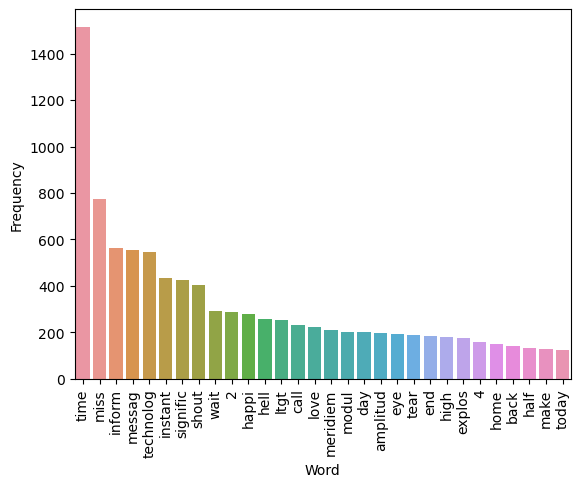

In [112]:
common_words = Counter(not_spam_corpus).most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

sns.barplot(x='Word', y='Frequency', data=df_common_words)
plt.xticks(rotation='vertical')
plt.show()


# 4. MODEL BUILDING

In [113]:
#INITIAL OUTPUT IS TO VECTORIZE THE TEXT

#### TRYING BOTH COUNT VECTORIZER AS WELL AS TFIDF

In [114]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import gensim
import os
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [115]:
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)
model = gensim.models.Word2Vec(window=10,min_count=2) 

In [288]:
bow = cv.fit_transform(df['transformed_text'])

In [289]:
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [290]:
print(cv.vocabulary_)

{'jurong': 3906, 'point': 5267, 'crazi': 2157, 'avail': 1290, 'bugi': 1665, 'great': 3268, 'world': 7390, 'buffet': 1663, 'amor': 1112, 'lar': 4069, 'joke': 3873, 'wif': 7311, 'free': 3013, 'entri': 2688, 'wkli': 7353, 'comp': 2033, 'time': 6749, 'win': 7322, 'cup': 2204, 'final': 2895, 'tkt': 6769, '21st': 451, '2005': 438, 'text': 6640, '87121': 856, 'receiv': 5581, 'questionstd': 5496, 'txt': 6926, 'ratetc': 5544, 'appli': 1177, '08452810075over18': 71, 'dun': 2574, 'signific': 6034, 'shout': 6009, 'earli': 2590, 'happi': 3362, 'end': 2665, 'high': 3456, 'explos': 2785, 'usf': 7047, 'live': 4179, 'freemsg': 3021, 'hey': 3446, 'darl': 2256, 'week': 7243, 'word': 7379, 'back': 1330, 'id': 3622, 'fun': 3073, 'inform': 3693, 'technolog': 6599, 'xxx': 7500, 'std': 6329, 'chg': 1890, 'send': 5907, '150': 350, 'rcv': 5553, 'miss': 4515, 'brother': 1638, 'speak': 6230, 'hell': 3415, 'treat': 6873, 'acquir': 965, 'immun': 3651, 'defici': 2325, 'syndrom': 6532, 'patent': 5106, 'request': 5660

In [291]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [292]:
x_cv = bow.toarray()

In [116]:
x_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()

In [117]:
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
print(tfidf.get_feature_names_out())

['008704050406' '020603' '0207' ... 'ìll' 'ìï' 'ûò']


In [119]:
x_cv.shape, x_tfidf.shape

NameError: name 'x_cv' is not defined

In [120]:
y = df['label'].values

In [121]:
y.shape

(5169,)

#### splitting into training set and test set

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_tfidf,y,random_state=42,test_size=0.2)

In [123]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
x_train.shape

(4135, 3000)

In [125]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [126]:
y_train.shape

(4135,)

In [127]:
x_test.shape,y_test.shape

((1034, 3000), (1034,))

#### applying naive bayes first as it is the best for text classification

In [133]:
from sklearn.naive_bayes import GaussianNB,  MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [134]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix,recall_score

In [267]:
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.804642166344294
[[708 181]
 [ 21 124]]
0.4065573770491803


In [136]:
mnb.fit(x_train,y_train)
y_pred = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9680851063829787
[[889   0]
 [ 33 112]]
1.0


In [269]:
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9680851063829787
[[886   3]
 [ 30 115]]
0.9745762711864406


#### trying all the other models

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [129]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [130]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'GNB':gnb,
    'NB': mnb,
    'BNB':bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [131]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [132]:
train_classifier(mnb,x_train,y_train,x_test,y_test)

NameError: name 'accuracy_score' is not defined

In [380]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9613152804642167
Precision -  0.9069767441860465
For  KN
Accuracy -  0.902321083172147
Precision -  0.9782608695652174
For  GNB
Accuracy -  0.804642166344294
Precision -  0.4065573770491803
For  NB
Accuracy -  0.960348162475822
Precision -  1.0
For  BNB
Accuracy -  0.9729206963249516
Precision -  0.9834710743801653
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8495575221238938
For  LR
Accuracy -  0.9458413926499033
Precision -  0.8739495798319328
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9333333333333333
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.8955223880597015
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9519230769230769
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9590163934426229


#### training all the models wrt cv, tfidf, tfidf with max features 3000 , tfidf with max features 5000

In [329]:
models_cv_perf_df = pd.DataFrame({'model':clfs.keys(),'accuracy_cv':accuracy_scores,'precision_cv':precision_scores}).sort_values('accuracy_cv',ascending=False)

In [330]:
models_cv_perf_df

,model,accuracy_cv,precision_cv
3,NB,0.970019,0.880000
6,LR,0.969052,0.959350
10,ETC,0.969052,0.991304
4,BNB,0.968085,0.974576
12,xgb,0.965184,0.965812
7,RF,0.963250,0.990826
9,BgC,0.958414,0.925000
8,AdaBoost,0.956480,0.890625
11,GBDT,0.941006,0.903846
5,DT,0.912959,0.816092


In [342]:
models_tfidf_perf_df = pd.DataFrame({'model':clfs.keys(),'accuracy_tfidf':accuracy_scores,'precision_tfidf':precision_scores}).sort_values('precision_tfidf',ascending=False)
models_tfidf_perf_df

,model,accuracy_tfidf,precision_tfidf
1,KN,0.892650,1.000000
3,NB,0.948743,1.000000
7,RF,0.970986,0.991453
10,ETC,0.970986,0.983193
4,BNB,0.968085,0.974576
12,xgb,0.970986,0.960000
11,GBDT,0.949710,0.951456
8,AdaBoost,0.955513,0.938053
9,BgC,0.963250,0.914729
0,SVC,0.962282,0.914062


In [362]:
models_tf300_perf_df = pd.DataFrame({'model':clfs.keys(),'accuracy_tf3000':accuracy_scores,'precision_tf3000':precision_scores}).sort_values('precision_tf3000',ascending=False)

In [381]:
models_tf5000_perf_df = pd.DataFrame({'model':clfs.keys(),'accuracy_tf5000':accuracy_scores,'precision_tf5000':precision_scores}).sort_values('precision_tf5000',ascending=False)

In [363]:
models_tf300_perf_df

,model,accuracy_tf3000,precision_tf3000
3,NB,0.968085,1.000000
7,RF,0.974855,0.991736
4,BNB,0.972921,0.991597
10,ETC,0.974855,0.983740
1,KN,0.904255,0.979167
11,GBDT,0.954545,0.971154
12,xgb,0.965184,0.950413
8,AdaBoost,0.957447,0.910569
0,SVC,0.966151,0.898551
9,BgC,0.961315,0.894737


In [382]:
models_tf5000_perf_df

,model,accuracy_tf5000,precision_tf5000
3,NB,0.960348,1.000000
7,RF,0.970019,0.991379
4,BNB,0.972921,0.983471
1,KN,0.902321,0.978261
10,ETC,0.971954,0.975410
12,xgb,0.968085,0.959016
11,GBDT,0.950677,0.951923
8,AdaBoost,0.960348,0.933333
0,SVC,0.961315,0.906977
9,BgC,0.962282,0.895522


In [388]:
temp = models_cv_perf_df.merge(models_tfidf_perf_df,on='model')
temp = temp.merge(models_tf300_perf_df,on='model')
temp = temp.merge(models_tf5000_perf_df,on='model')
temp

,model,accuracy_cv,precision_cv,accuracy_tfidf,precision_tfidf,accuracy_tf3000,precision_tf3000,accuracy_tf5000,precision_tf5000
0,NB,0.970019,0.880000,0.948743,1.000000,0.968085,1.000000,0.960348,1.000000
1,LR,0.969052,0.959350,0.942940,0.870690,0.945841,0.867769,0.945841,0.873950
2,ETC,0.969052,0.991304,0.970986,0.983193,0.974855,0.983740,0.971954,0.975410
3,BNB,0.968085,0.974576,0.968085,0.974576,0.972921,0.991597,0.972921,0.983471
4,xgb,0.965184,0.965812,0.970986,0.960000,0.965184,0.950413,0.968085,0.959016
5,RF,0.963250,0.990826,0.970986,0.991453,0.974855,0.991736,0.970019,0.991379
6,BgC,0.958414,0.925000,0.963250,0.914729,0.961315,0.894737,0.962282,0.895522
7,AdaBoost,0.956480,0.890625,0.955513,0.938053,0.957447,0.910569,0.960348,0.933333
8,GBDT,0.941006,0.903846,0.949710,0.951456,0.954545,0.971154,0.950677,0.951923
9,DT,0.912959,0.816092,0.935203,0.867925,0.933269,0.865385,0.936170,0.849558


### trying ensemble learning models

### A. VOTING CLASSIFIER

In [413]:
from sklearn.ensemble import VotingClassifier

In [416]:
rf = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
voting = VotingClassifier(estimators=[('etc', etc), ('nb', mnb),('svm',svc)],voting='soft')

In [417]:
voting.fit(x_train,y_train)
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9919354838709677


### B. STACKING CLASSIFIER

In [407]:
from sklearn.ensemble import StackingClassifier

In [408]:
estimators=[('svm', svc), ('nb', mnb), ('etc', etc)]
final_estimator=rf
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [409]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9694656488549618


# 5. DEPLOYING THE MODEL

In [137]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

CHOOSING THE BEST MODEL AS TFIDF WITH 3000 FEATURES AND MULTINOMIAL NAIVE BAYES AS THE MODEL

In [138]:
import pickle
with open('vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)
    print(tfidf)

TfidfVectorizer(max_features=3000)


In [139]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
    print(model)

MultinomialNB()


In [142]:
pd.__version__

'1.5.3'

In [150]:
sklearn.__version__

'1.2.2'

In [149]:
import sklearn